In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions/text.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/emotions/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
df.columns

Index(['Unnamed: 0', 'text', 'label'], dtype='object')

In [5]:
# Basic info and class distribution
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB
None


In [6]:
print(df['label'].value_counts())

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


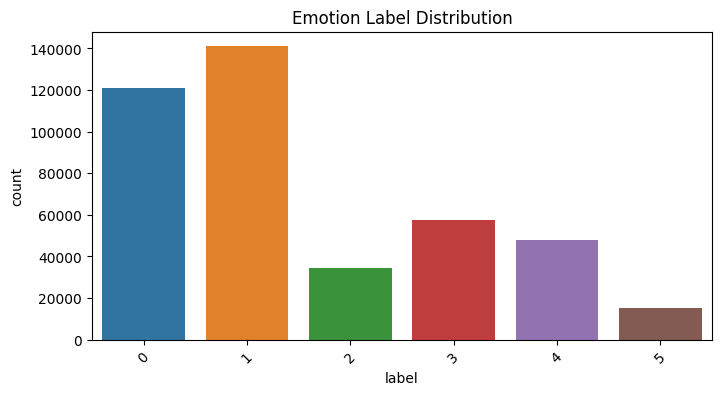

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot label counts
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=df)
plt.title("Emotion Label Distribution")
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features and target
X = df['text']
y = LabelEncoder().fit_transform(df['label'])  # Convert text labels to numbers

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numeric vectors
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression

# Train a simple and powerful model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [12]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test_vec)

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.894244379933303
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     24201
           1       0.91      0.93      0.92     28164
           2       0.79      0.75      0.77      6929
           3       0.90      0.90      0.90     11441
           4       0.85      0.83      0.84      9594
           5       0.75      0.69      0.72      3033

    accuracy                           0.89     83362
   macro avg       0.86      0.84      0.85     83362
weighted avg       0.89      0.89      0.89     83362



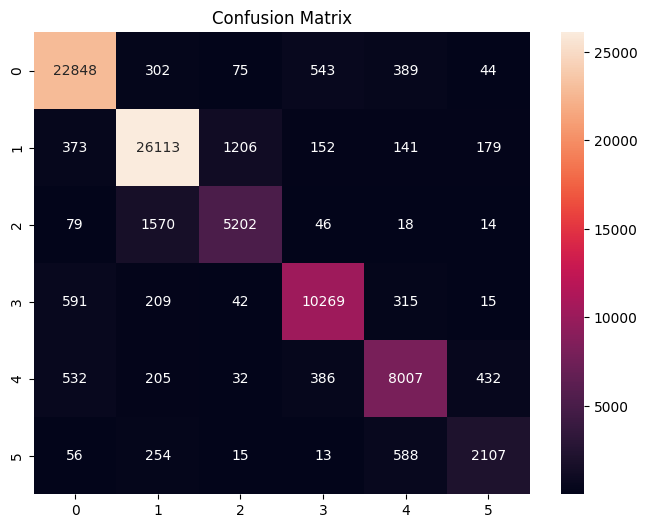

In [13]:
# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()